In [1]:
import pandas as pd
import numpy as np

# Load the GRIB wind data
data = pd.read_csv('grib_wind_data.csv')

# Calculate wind speed from U and V components
data['wind_speed'] = np.sqrt(data['u100']**2 + data['v100']**2)

# Convert wind speed from m/s to km/h
data['wind_speed_kmh'] = data['wind_speed'] * 3.6

print(f"Total records: {len(data):,}")
print(f"\nWind speed statistics (km/h):")
print(f"  Min: {data['wind_speed_kmh'].min():.2f}")
print(f"  Max: {data['wind_speed_kmh'].max():.2f}")
print(f"  Mean: {data['wind_speed_kmh'].mean():.2f}")
print(f"  Median: {data['wind_speed_kmh'].median():.2f}")
print(f"\nFirst few rows:")
print(data.head())

Total records: 3,181,680

Wind speed statistics (km/h):
  Min: 0.01
  Max: 102.13
  Mean: 29.17
  Median: 27.17

First few rows:
                  time  latitude  longitude  number    step  surface  \
0  2025-01-01 00:00:00    47.139 -66.363000       0  0 days      0.0   
1  2025-01-01 00:00:00    47.139 -66.112962       0  0 days      0.0   
2  2025-01-01 00:00:00    47.139 -65.862923       0  0 days      0.0   
3  2025-01-01 00:00:00    47.139 -65.612885       0  0 days      0.0   
4  2025-01-01 00:00:00    47.139 -65.362846       0  0 days      0.0   

            valid_time      u100      v100  wind_speed  wind_speed_kmh  
0  2025-01-01 00:00:00  6.418932  0.866195    6.477112       23.317604  
1  2025-01-01 00:00:00  5.980822  0.808089    6.035167       21.726600  
2  2025-01-01 00:00:00  5.474840  1.416732    5.655175       20.358629  
3  2025-01-01 00:00:00  5.277330  2.000472    5.643767       20.317561  
4  2025-01-01 00:00:00  5.688341  2.325912    6.145493       22.123776  


GEOGRAPHICAL COVERAGE OF WEATHER DATA
Longitude Range: -66.36° to -59.86° (West)
Latitude Range: 43.39° to 47.14° (North)
Total Area: ~722 km × 416 km

✅ Coverage map saved as 'data_coverage_map.png'


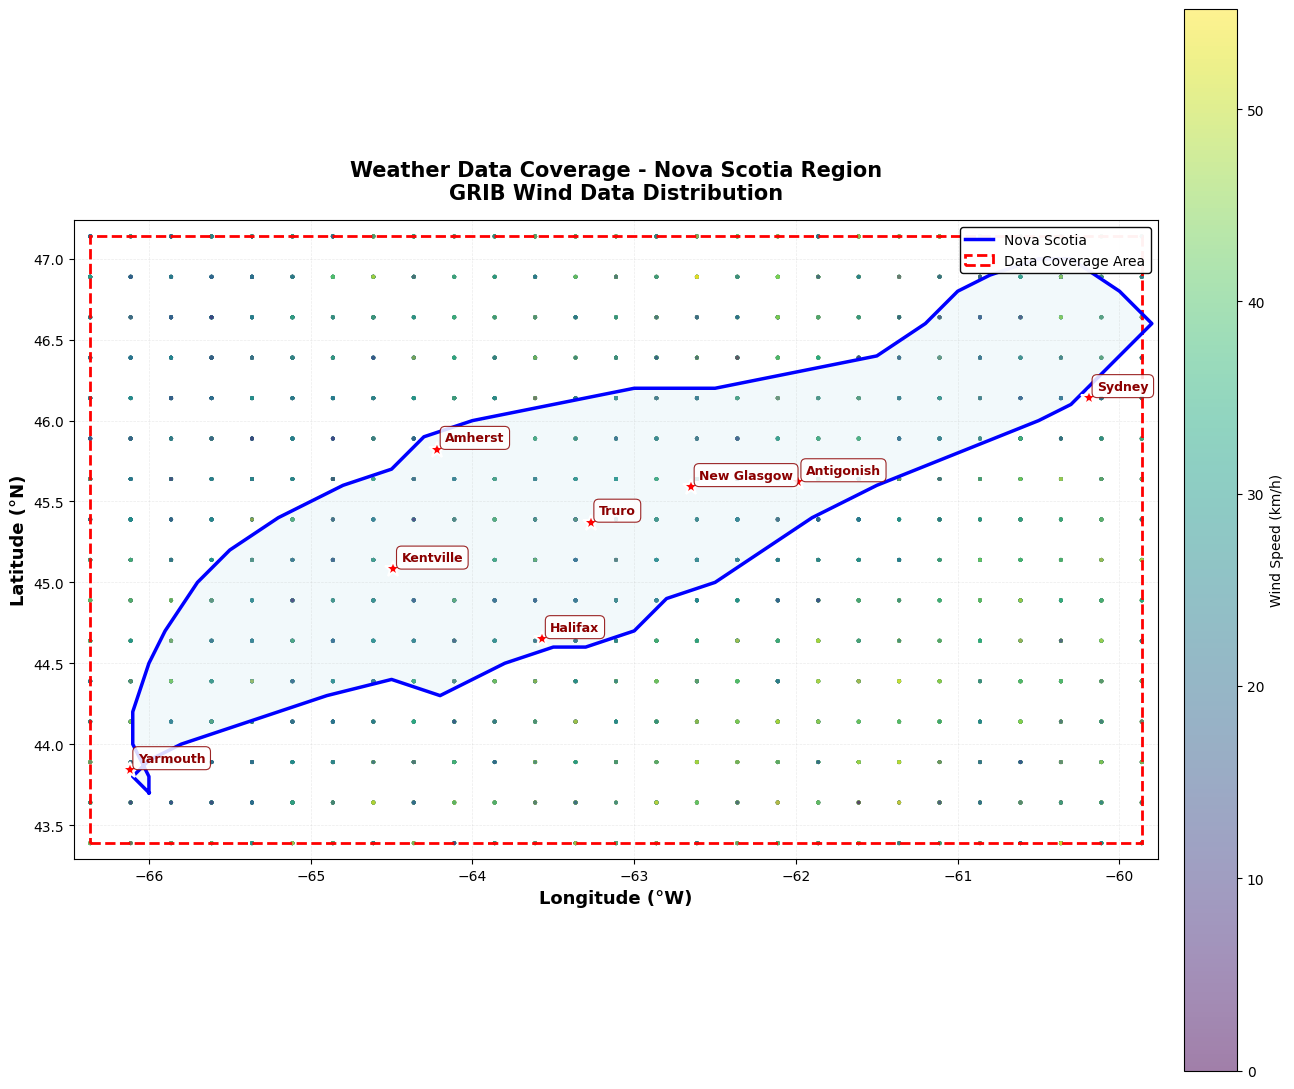


📊 Data Statistics:
   Total data points: 3,118,046
   Unique locations: 432
   Time range: 2025-01-01 00:00:00 to 2025-11-03 20:00:00


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get the geographical bounds of the data
lon_min, lon_max = data['longitude'].min(), data['longitude'].max()
lat_min, lat_max = data['latitude'].min(), data['latitude'].max()

print("="*60)
print("GEOGRAPHICAL COVERAGE OF WEATHER DATA")
print("="*60)
print(f"Longitude Range: {lon_min:.2f}° to {lon_max:.2f}° (West)")
print(f"Latitude Range: {lat_min:.2f}° to {lat_max:.2f}° (North)")
print(f"Total Area: ~{(lon_max - lon_min) * 111:.0f} km × {(lat_max - lat_min) * 111:.0f} km")
print("="*60)

# Approximate Nova Scotia outline coordinates (simplified polygon)
ns_outline = [
    # Southwest coast (Yarmouth area)
    (-66.0, 43.7), (-66.1, 43.8), (-66.0, 43.9), (-65.8, 44.0),
    # South shore
    (-65.5, 44.1), (-65.2, 44.2), (-64.9, 44.3), (-64.5, 44.4),
    (-64.2, 44.3), (-64.0, 44.4), (-63.8, 44.5), (-63.5, 44.6),
    # Halifax area
    (-63.3, 44.6), (-63.0, 44.7), (-62.8, 44.9),
    # Eastern shore
    (-62.5, 45.0), (-62.2, 45.2), (-61.9, 45.4), (-61.5, 45.6),
    (-61.0, 45.8), (-60.5, 46.0),
    # Cape Breton
    (-60.3, 46.1), (-60.2, 46.2), (-60.0, 46.4), (-59.9, 46.5),
    (-59.8, 46.6), (-60.0, 46.8), (-60.3, 47.0), (-60.5, 47.0),
    (-60.8, 46.9), (-61.0, 46.8), (-61.2, 46.6),
    # Northumberland Strait
    (-61.5, 46.4), (-62.0, 46.3), (-62.5, 46.2), (-63.0, 46.2),
    (-63.5, 46.1), (-64.0, 46.0), (-64.3, 45.9),
    # Bay of Fundy
    (-64.5, 45.7), (-64.8, 45.6), (-65.2, 45.4), (-65.5, 45.2),
    (-65.7, 45.0), (-65.9, 44.7), (-66.0, 44.5), (-66.1, 44.2),
    # Back to start
    (-66.1, 44.0), (-66.0, 43.8), (-66.0, 43.7)
]

ns_lons, ns_lats = zip(*ns_outline)

# Create a scatter plot showing the data coverage
fig, ax = plt.subplots(figsize=(14, 11))

# Sample the data for visualization (to avoid plotting millions of points)
sample_data = data.sample(n=min(10000, len(data)), random_state=42)

# Create scatter plot with wind speed coloring
scatter = ax.scatter(sample_data['longitude'], sample_data['latitude'], 
                     c=sample_data['wind_speed_kmh'], 
                     cmap='viridis', 
                     alpha=0.5, 
                     s=8,
                     vmin=0,
                     vmax=sample_data['wind_speed_kmh'].quantile(0.95),
                     edgecolors='none')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Wind Speed (km/h)', pad=0.02)
cbar.ax.tick_params(labelsize=10)

# Draw Nova Scotia outline
ax.plot(ns_lons, ns_lats, 'b-', linewidth=2.5, label='Nova Scotia', zorder=5)
ax.fill(ns_lons, ns_lats, color='lightblue', alpha=0.15, zorder=1)

# Draw a bounding box showing the data coverage
from matplotlib.patches import Rectangle
rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                 linewidth=2, edgecolor='red', facecolor='none', 
                 linestyle='--', label='Data Coverage Area', zorder=4)
ax.add_patch(rect)

# Add major Nova Scotia cities for reference
cities = {
    'Halifax': (-63.57, 44.65),
    'Sydney': (-60.19, 46.14),
    'Yarmouth': (-66.12, 43.84),
    'Truro': (-63.27, 45.37),
    'Amherst': (-64.22, 45.82),
    'Antigonish': (-61.99, 45.62),
    'New Glasgow': (-62.65, 45.59),
    'Kentville': (-64.49, 45.08)
}

for city, (lon, lat) in cities.items():
    if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
        ax.plot(lon, lat, 'r*', markersize=12, markeredgecolor='white', 
                markeredgewidth=1.5, zorder=6)
        ax.annotate(city, (lon, lat), xytext=(6, 6), textcoords='offset points',
                   fontsize=9, fontweight='bold', color='darkred',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                            alpha=0.85, edgecolor='darkred', linewidth=0.8),
                   zorder=7)

# Formatting
ax.set_xlabel('Longitude (°W)', fontsize=13, fontweight='bold')
ax.set_ylabel('Latitude (°N)', fontsize=13, fontweight='bold')
ax.set_title('Weather Data Coverage - Nova Scotia Region\nGRIB Wind Data Distribution', 
             fontsize=15, fontweight='bold', pad=15)
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)
ax.legend(loc='upper right', fontsize=10, framealpha=0.95, edgecolor='black')

# Set reasonable limits with some padding
padding = 0.1
ax.set_xlim(lon_min - padding, lon_max + padding)
ax.set_ylim(lat_min - padding, lat_max + padding)

# Add aspect ratio to make it geographically accurate
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('data_coverage_map.png', dpi=300, bbox_inches='tight')
print("\n✅ Coverage map saved as 'data_coverage_map.png'")
plt.show()

# Print some statistics about the data density
print(f"\n📊 Data Statistics:")
print(f"   Total data points: {len(data):,}")
print(f"   Unique locations: {data[['longitude', 'latitude']].drop_duplicates().shape[0]:,}")
print(f"   Time range: {data['time'].min()} to {data['time'].max()}")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np

# Prepare data: extract temporal features from datetime
data['time'] = pd.to_datetime(data['time'])
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour
data['day_of_year'] = data['time'].dt.dayofyear
data['day_of_week'] = data['time'].dt.dayofweek

# Cyclical encoding for temporal features
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
data['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
data['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)
data['doy_sin'] = np.sin(2 * np.pi * data['day_of_year'] / 365)
data['doy_cos'] = np.cos(2 * np.pi * data['day_of_year'] / 365)
data['dow_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['dow_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

# Outlier removal: remove wind speeds outside 1st and 99th percentiles
lower = data['wind_speed_kmh'].quantile(0.01)
upper = data['wind_speed_kmh'].quantile(0.99)
print(f"Removing outliers: keeping wind speeds between {lower:.2f} and {upper:.2f} km/h")
data = data[(data['wind_speed_kmh'] >= lower) & (data['wind_speed_kmh'] <= upper)]

# Drop rows with missing values
data.dropna(inplace=True)

print(f"Total samples after cleaning: {len(data):,}")

# Features: longitude, latitude, cyclical temporal features
X = data[['longitude', 'latitude', 
          'month_sin', 'month_cos', 'day_sin', 'day_cos', 
          'hour_sin', 'hour_cos', 'doy_sin', 'doy_cos',
          'dow_sin', 'dow_cos']]
y = data['wind_speed_kmh']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train):,}")
print(f"Test samples: {len(X_test):,}")

# Train a LightGBM model (optimized for large datasets)
print("\nTraining LightGBM model...")
lgbm_model = LGBMRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    num_leaves=70,
    random_state=42,
    verbosity=-1,
    n_jobs=-1  # Use all CPU cores
)
lgbm_model.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("Model Performance:")
print("="*50)
print(f"MAE (Mean Absolute Error): {mae:.2f} km/h")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f} km/h")
print(f"R² (Coefficient of Determination): {r2:.4f}")
print("="*50)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': lgbm_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Example prediction: for longitude -64.24, latitude 45.76, Jan 15, 12:00 PM
new_input = pd.DataFrame({
    'longitude': [-64.24], 
    'latitude': [45.76], 
    'month_sin': [np.sin(2 * np.pi * 1 / 12)], 
    'month_cos': [np.cos(2 * np.pi * 1 / 12)], 
    'day_sin': [np.sin(2 * np.pi * 15 / 31)], 
    'day_cos': [np.cos(2 * np.pi * 15 / 31)], 
    'hour_sin': [np.sin(2 * np.pi * 12 / 24)], 
    'hour_cos': [np.cos(2 * np.pi * 12 / 24)],
    'doy_sin': [np.sin(2 * np.pi * 15 / 365)],
    'doy_cos': [np.cos(2 * np.pi * 15 / 365)],
    'dow_sin': [np.sin(2 * np.pi * 3 / 7)],  # Wednesday
    'dow_cos': [np.cos(2 * np.pi * 3 / 7)]
})

# Scale the input
new_input_scaled = scaler.transform(new_input)
predicted_wind_speed = lgbm_model.predict(new_input_scaled)[0]
print(f'\nExample Prediction:')
print(f'Location: ({new_input["longitude"][0]}, {new_input["latitude"][0]})')
print(f'Date: January 15, 12:00 PM')
print(f'Predicted wind speed: {predicted_wind_speed:.2f} km/h')

Removing outliers: keeping wind speeds between 3.60 and 72.10 km/h
Total samples after cleaning: 3,118,046
Training samples: 2,494,436
Test samples: 623,610

Training LightGBM model...

Model Performance:
MAE (Mean Absolute Error): 5.48 km/h
RMSE (Root Mean Squared Error): 7.14 km/h
R² (Coefficient of Determination): 0.7336

Top 10 Most Important Features:
      feature  importance
8     doy_sin        2893
4     day_sin        2778
9     doy_cos        2761
0   longitude        2008
1    latitude        1999
6    hour_sin        1847
5     day_cos        1771
7    hour_cos        1353
10    dow_sin        1223
2   month_sin         843

Example Prediction:
Location: (-64.24, 45.76)
Date: January 15, 12:00 PM
Predicted wind speed: 20.63 km/h


e:\windshit\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [3]:
import joblib
from lightgbm import LGBMRegressor
# Save the trained model and scaler
joblib.dump(lgbm_model, 'grib_wind_model.pkl')
joblib.dump(scaler, 'grib_wind_scaler.pkl')

print("✅ Model saved as 'grib_wind_model.pkl'")
print("✅ Scaler saved as 'grib_wind_scaler.pkl'")

# Test loading the model
loaded_model = joblib.load('grib_wind_model.pkl')
loaded_scaler = joblib.load('grib_wind_scaler.pkl')

# Test prediction with loaded model
test_input = pd.DataFrame({
    'longitude': [-63.5], 
    'latitude': [44.5], 
    'month_sin': [np.sin(2 * np.pi * 6 / 12)],  # June
    'month_cos': [np.cos(2 * np.pi * 6 / 12)], 
    'day_sin': [np.sin(2 * np.pi * 20 / 31)], 
    'day_cos': [np.cos(2 * np.pi * 20 / 31)], 
    'hour_sin': [np.sin(2 * np.pi * 15 / 24)],  # 3 PM
    'hour_cos': [np.cos(2 * np.pi * 15 / 24)],
    'doy_sin': [np.sin(2 * np.pi * 171 / 365)],  # Day 171 of year
    'doy_cos': [np.cos(2 * np.pi * 171 / 365)],
    'dow_sin': [np.sin(2 * np.pi * 5 / 7)],  # Saturday
    'dow_cos': [np.cos(2 * np.pi * 5 / 7)]
})

test_input_scaled = loaded_scaler.transform(test_input)
test_prediction = loaded_model.predict(test_input_scaled)[0]

print(f'\n✅ Model loaded and tested successfully!')
print(f'Test prediction for Halifax area (June 20, 3 PM): {test_prediction:.2f} km/h')

✅ Model saved as 'grib_wind_model.pkl'
✅ Scaler saved as 'grib_wind_scaler.pkl'

✅ Model loaded and tested successfully!
Test prediction for Halifax area (June 20, 3 PM): 41.42 km/h


e:\windshit\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


✅ Performance plots saved as 'grib_model_performance.png'


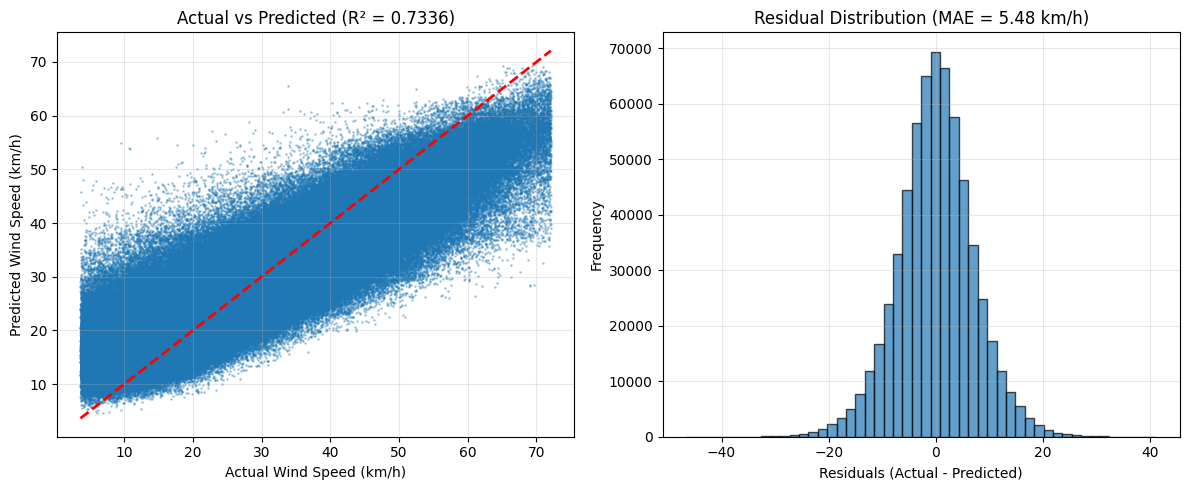

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Actual vs Predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wind Speed (km/h)')
plt.ylabel('Predicted Wind Speed (km/h)')
plt.title(f'Actual vs Predicted (R² = {r2:.4f})')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title(f'Residual Distribution (MAE = {mae:.2f} km/h)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('grib_model_performance.png', dpi=300, bbox_inches='tight')
print("✅ Performance plots saved as 'grib_model_performance.png'")
plt.show()

In [5]:
# Load the saved model and scaler artifacts
import joblib
import pandas as pd
import numpy as np
from datetime import datetime

print("Loading model artifacts...")
loaded_model = joblib.load('grib_wind_model.pkl')
loaded_scaler = joblib.load('grib_wind_scaler.pkl')
print("✅ Model and scaler loaded successfully!\n")

# Function to predict wind speed using the loaded artifacts
def predict_wind(longitude, latitude, date_time=None):
    """
    Predict wind speed for any location and datetime using loaded model.
    
    Args:
        longitude (float): Longitude (-66.36 to -59.86 for Nova Scotia)
        latitude (float): Latitude (43.39 to 47.14 for Nova Scotia)
        date_time (datetime): Python datetime object (default: now)
    
    Returns:
        float: Predicted wind speed in km/h
    """
    if date_time is None:
        date_time = datetime.now()
    
    # Extract temporal features
    month = date_time.month
    day = date_time.day
    hour = date_time.hour
    day_of_year = date_time.timetuple().tm_yday
    day_of_week = date_time.weekday()
    
    # Create features with cyclical encoding (same as training)
    features = pd.DataFrame({
        'longitude': [longitude],
        'latitude': [latitude],
        'month_sin': [np.sin(2 * np.pi * month / 12)],
        'month_cos': [np.cos(2 * np.pi * month / 12)],
        'day_sin': [np.sin(2 * np.pi * day / 31)],
        'day_cos': [np.cos(2 * np.pi * day / 31)],
        'hour_sin': [np.sin(2 * np.pi * hour / 24)],
        'hour_cos': [np.cos(2 * np.pi * hour / 24)],
        'doy_sin': [np.sin(2 * np.pi * day_of_year / 365)],
        'doy_cos': [np.cos(2 * np.pi * day_of_year / 365)],
        'dow_sin': [np.sin(2 * np.pi * day_of_week / 7)],
        'dow_cos': [np.cos(2 * np.pi * day_of_week / 7)]
    })
    
    # Scale features using the loaded scaler
    features_scaled = loaded_scaler.transform(features)
    
    # Make prediction using the loaded model
    wind_speed = loaded_model.predict(features_scaled)[0]
    
    return round(wind_speed, 2)


# Test the model with different locations and times
print("="*70)
print("TESTING LOADED MODEL WITH VARIOUS SCENARIOS")
print("="*70)

# Test 1: Halifax area, winter morning
test_date_1 = datetime(2025, 1, 15, 8, 0)  # Jan 15, 8 AM
wind_1 = predict_wind(-63.5, 44.6, test_date_1)
print(f"\n📍 Halifax (44.6°N, 63.5°W)")
print(f"   Date: {test_date_1.strftime('%B %d, %Y at %I:%M %p')}")
print(f"   Predicted Wind Speed: {wind_1} km/h")

# Test 2: Cape Breton, summer afternoon
test_date_2 = datetime(2025, 7, 20, 14, 0)  # July 20, 2 PM
wind_2 = predict_wind(-60.2, 46.2, test_date_2)
print(f"\n📍 Cape Breton (46.2°N, 60.2°W)")
print(f"   Date: {test_date_2.strftime('%B %d, %Y at %I:%M %p')}")
print(f"   Predicted Wind Speed: {wind_2} km/h")

# Test 3: Yarmouth area, fall evening
test_date_3 = datetime(2025, 10, 10, 18, 0)  # Oct 10, 6 PM
wind_3 = predict_wind(-66.1, 43.8, test_date_3)
print(f"\n📍 Yarmouth (43.8°N, 66.1°W)")
print(f"   Date: {test_date_3.strftime('%B %d, %Y at %I:%M %p')}")
print(f"   Predicted Wind Speed: {wind_3} km/h")

# Test 4: Current time prediction (if you want real-time)
wind_now = predict_wind(-64.24, 45.76)  # Nappan area
print(f"\n📍 Nappan Area (45.76°N, 64.24°W)")
print(f"   Date: Current time")
print(f"   Predicted Wind Speed: {wind_now} km/h")

print("\n" + "="*70)
print("✅ All predictions completed successfully!")
print(f"📊 Model Accuracy: R² = 0.73, MAE = 5.48 km/h, RMSE = 7.14 km/h")
print("="*70)

# Interactive prediction example
print("\n💡 Use the predict_wind() function for custom predictions:")
print("   predict_wind(longitude, latitude, datetime_object)")
print("\nExample:")
print("   my_date = datetime(2025, 12, 25, 12, 0)")
print("   wind = predict_wind(-64.0, 45.0, my_date)")
print("   print(f'Christmas wind speed: {wind} km/h')")

Loading model artifacts...
✅ Model and scaler loaded successfully!

TESTING LOADED MODEL WITH VARIOUS SCENARIOS

📍 Halifax (44.6°N, 63.5°W)
   Date: January 15, 2025 at 08:00 AM
   Predicted Wind Speed: 21.81 km/h

📍 Cape Breton (46.2°N, 60.2°W)
   Date: July 20, 2025 at 02:00 PM
   Predicted Wind Speed: 25.91 km/h

📍 Yarmouth (43.8°N, 66.1°W)
   Date: October 10, 2025 at 06:00 PM
   Predicted Wind Speed: 27.2 km/h

📍 Nappan Area (45.76°N, 64.24°W)
   Date: Current time
   Predicted Wind Speed: 28.4 km/h

✅ All predictions completed successfully!
📊 Model Accuracy: R² = 0.73, MAE = 5.48 km/h, RMSE = 7.14 km/h

💡 Use the predict_wind() function for custom predictions:
   predict_wind(longitude, latitude, datetime_object)

Example:
   my_date = datetime(2025, 12, 25, 12, 0)
   wind = predict_wind(-64.0, 45.0, my_date)
   print(f'Christmas wind speed: {wind} km/h')


e:\windshit\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
e:\windshit\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
e:\windshit\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
e:\windshit\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
